In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import itertools
from scipy.optimize import curve_fit
%matplotlib inline

def vsffit(lag,lna,p):
    return (lna+p*lag)

dcloud = ['M3','M4','M8']
dtime  = ['0010','0030','0042']
#dtime  = ['0012','0035','0040']
djeans = ['04','08','32']

nrow   = 3
ncol   = 3
color  = ['red','green','blue']
ms     = 10
lw     = 4

dpic   = '/Users/roxanachira/Dropbox/chira2018/pics/'

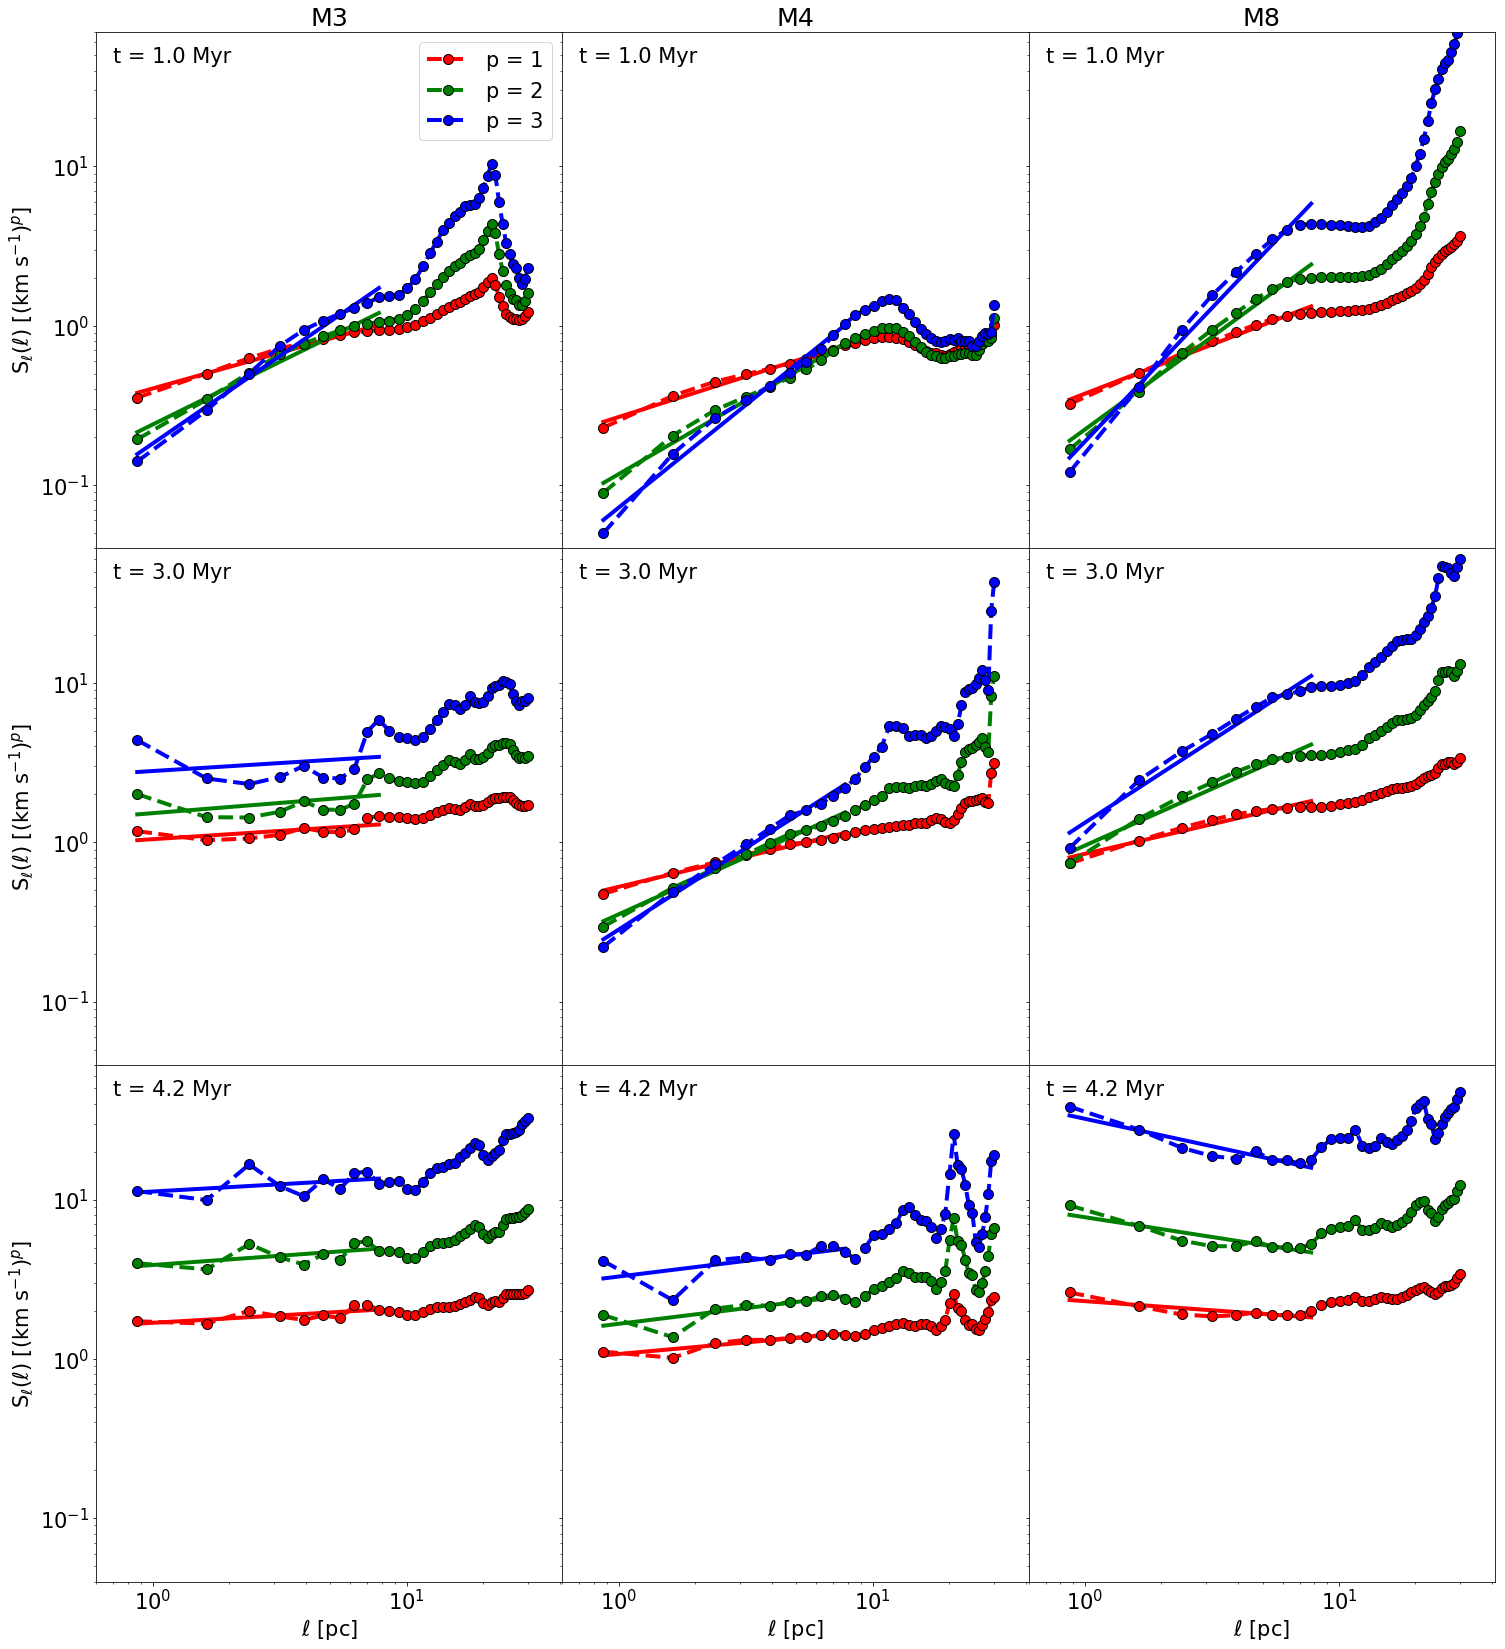

In [2]:
plt.rcParams['font.size'] = 21
fig,ax = plt.subplots(nrows=nrow,ncols=ncol,sharex=True,sharey=True,figsize=(21,23))

xlim   = [0.6,41]
ylim   = [4e-2,7e1]
dturb  = '/Volumes/2TB-BACKUP/turbulence/strucfunc/vsfhr04/'
for icloud,itime in itertools.product(range(len(dcloud)),range(len(dtime))):
    cloud = dcloud[icloud]
    time  = dtime[itime]
    ifile = glob(dturb+'vel_struc_func_'+cloud+'_'+time+'.dat')[0]
    ltot,s1,s2,s3 = np.array([]),np.array([]),np.array([]),np.array([])
    ltot,s1,s2,s3 = np.loadtxt(ifile,usecols=(0,1,2,3),skiprows=2,unpack=True)
    
    for p in range(1,4):
        if(p == 1): s = s1
        if(p == 2): s = s2
        if(p == 3): s = s3
        
        h = np.where(ltot <= 8.)[0]
        popt, pcov = curve_fit(vsffit,np.log10(ltot[h]),np.log10(s[h]))
        ax[itime,icloud].plot(ltot[h],10.**vsffit(np.log10(ltot[h]),*popt),ls='-',color=color[p-1],ms=ms,lw=lw,markeredgecolor='black')
        ax[itime,icloud].plot(ltot,s,color=color[p-1],ls='--',marker='o',ms=ms,lw=lw,markeredgecolor='black',label=('p = %i' % (p)))
               
    ax[itime,icloud].set_xscale('log')
    ax[itime,icloud].set_yscale('log')
    ax[itime,icloud].set_xlim(xlim)
    ax[itime,icloud].set_ylim(ylim)
    
    if(icloud == 0):
        ax[itime,icloud].set_ylabel('S$_{\ell}$(${\ell}$) [(km s$^{-1}$)$^p$]') 
    if(itime == 0):
        ax[itime,icloud].set_title('%s' % (cloud))
    if(itime == len(dtime)-1):
        ax[itime,icloud].set_xlabel('${\ell}$ [pc]')
    if(icloud == 0 and itime == 0): 
        ax[itime,icloud].legend(loc=0)
        
    ax[itime,icloud].text(0.7,45,'t = %3.1f Myr' % (float(time)*0.1))
        
fig.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(dpic+'app_examples_wthres_s_l.pdf')

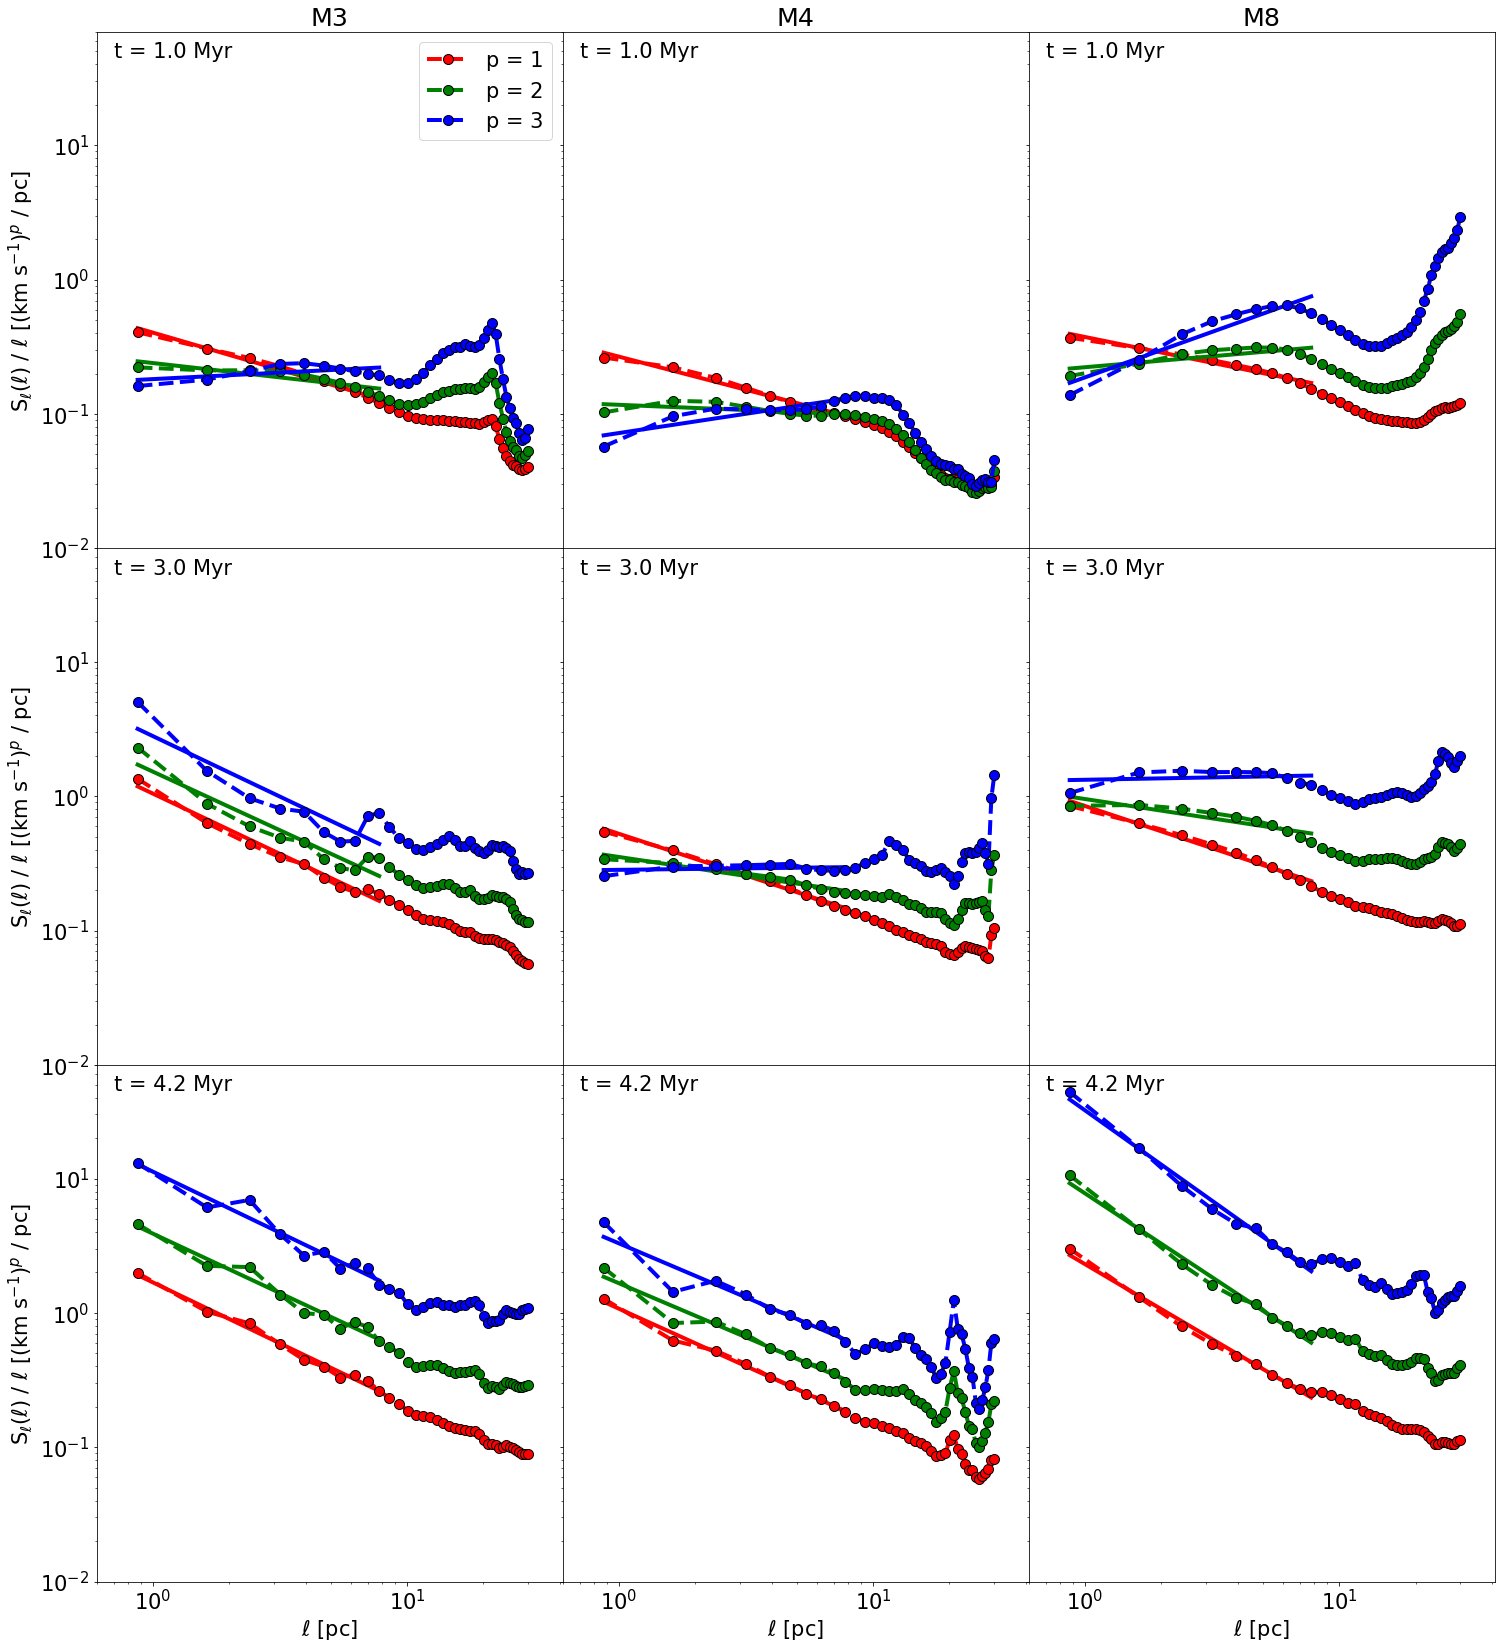

In [3]:
plt.rcParams['font.size'] = 21
fig,ax = plt.subplots(nrows=nrow,ncols=ncol,sharex=True,sharey=True,figsize=(21,23))

xlim   = [0.6,41]
ylim   = [1e-2,7e1]
dturb  = '/Volumes/2TB-BACKUP/turbulence/strucfunc/vsfhr04/'
for icloud,itime in itertools.product(range(len(dcloud)),range(len(dtime))):
    cloud = dcloud[icloud]
    time  = dtime[itime]
    ifile = glob(dturb+'vel_struc_func_'+cloud+'_'+time+'.dat')[0]
    ltot,s1,s2,s3 = np.array([]),np.array([]),np.array([]),np.array([])
    ltot,s1,s2,s3 = np.loadtxt(ifile,usecols=(0,1,2,3),skiprows=2,unpack=True)
    
    for p in range(1,4):
        if(p == 1): s = s1
        if(p == 2): s = s2
        if(p == 3): s = s3
        s = s/ltot
        
        h = np.where(ltot <= 8.)[0]
        popt, pcov = curve_fit(vsffit,np.log10(ltot[h]),np.log10(s[h]))
        ax[itime,icloud].plot(ltot[h],10.**vsffit(np.log10(ltot[h]),*popt),ls='-',color=color[p-1],ms=ms,lw=lw,markeredgecolor='black')
        ax[itime,icloud].plot(ltot,s,color=color[p-1],ls='--',marker='o',ms=ms,lw=lw,markeredgecolor='black',label=('p = %i' % (p)))
               
    ax[itime,icloud].set_xscale('log')
    ax[itime,icloud].set_yscale('log')
    ax[itime,icloud].set_xlim(xlim)
    ax[itime,icloud].set_ylim(ylim)
    
    if(icloud == 0):
        ax[itime,icloud].set_ylabel('S$_{\ell}$(${\ell}$) / ${\ell}$ [(km s$^{-1}$)$^p$ / pc]') 
    if(itime == 0):
        ax[itime,icloud].set_title('%s' % (cloud))
    if(itime == len(dtime)-1):
        ax[itime,icloud].set_xlabel('${\ell}$ [pc]')
    if(icloud == 0 and itime == 0): 
        ax[itime,icloud].legend(loc=0)
        
    ax[itime,icloud].text(0.7,45,'t = %3.1f Myr' % (float(time)*0.1))
        
fig.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(dpic+'app_examples_wthres_sl_l.pdf')

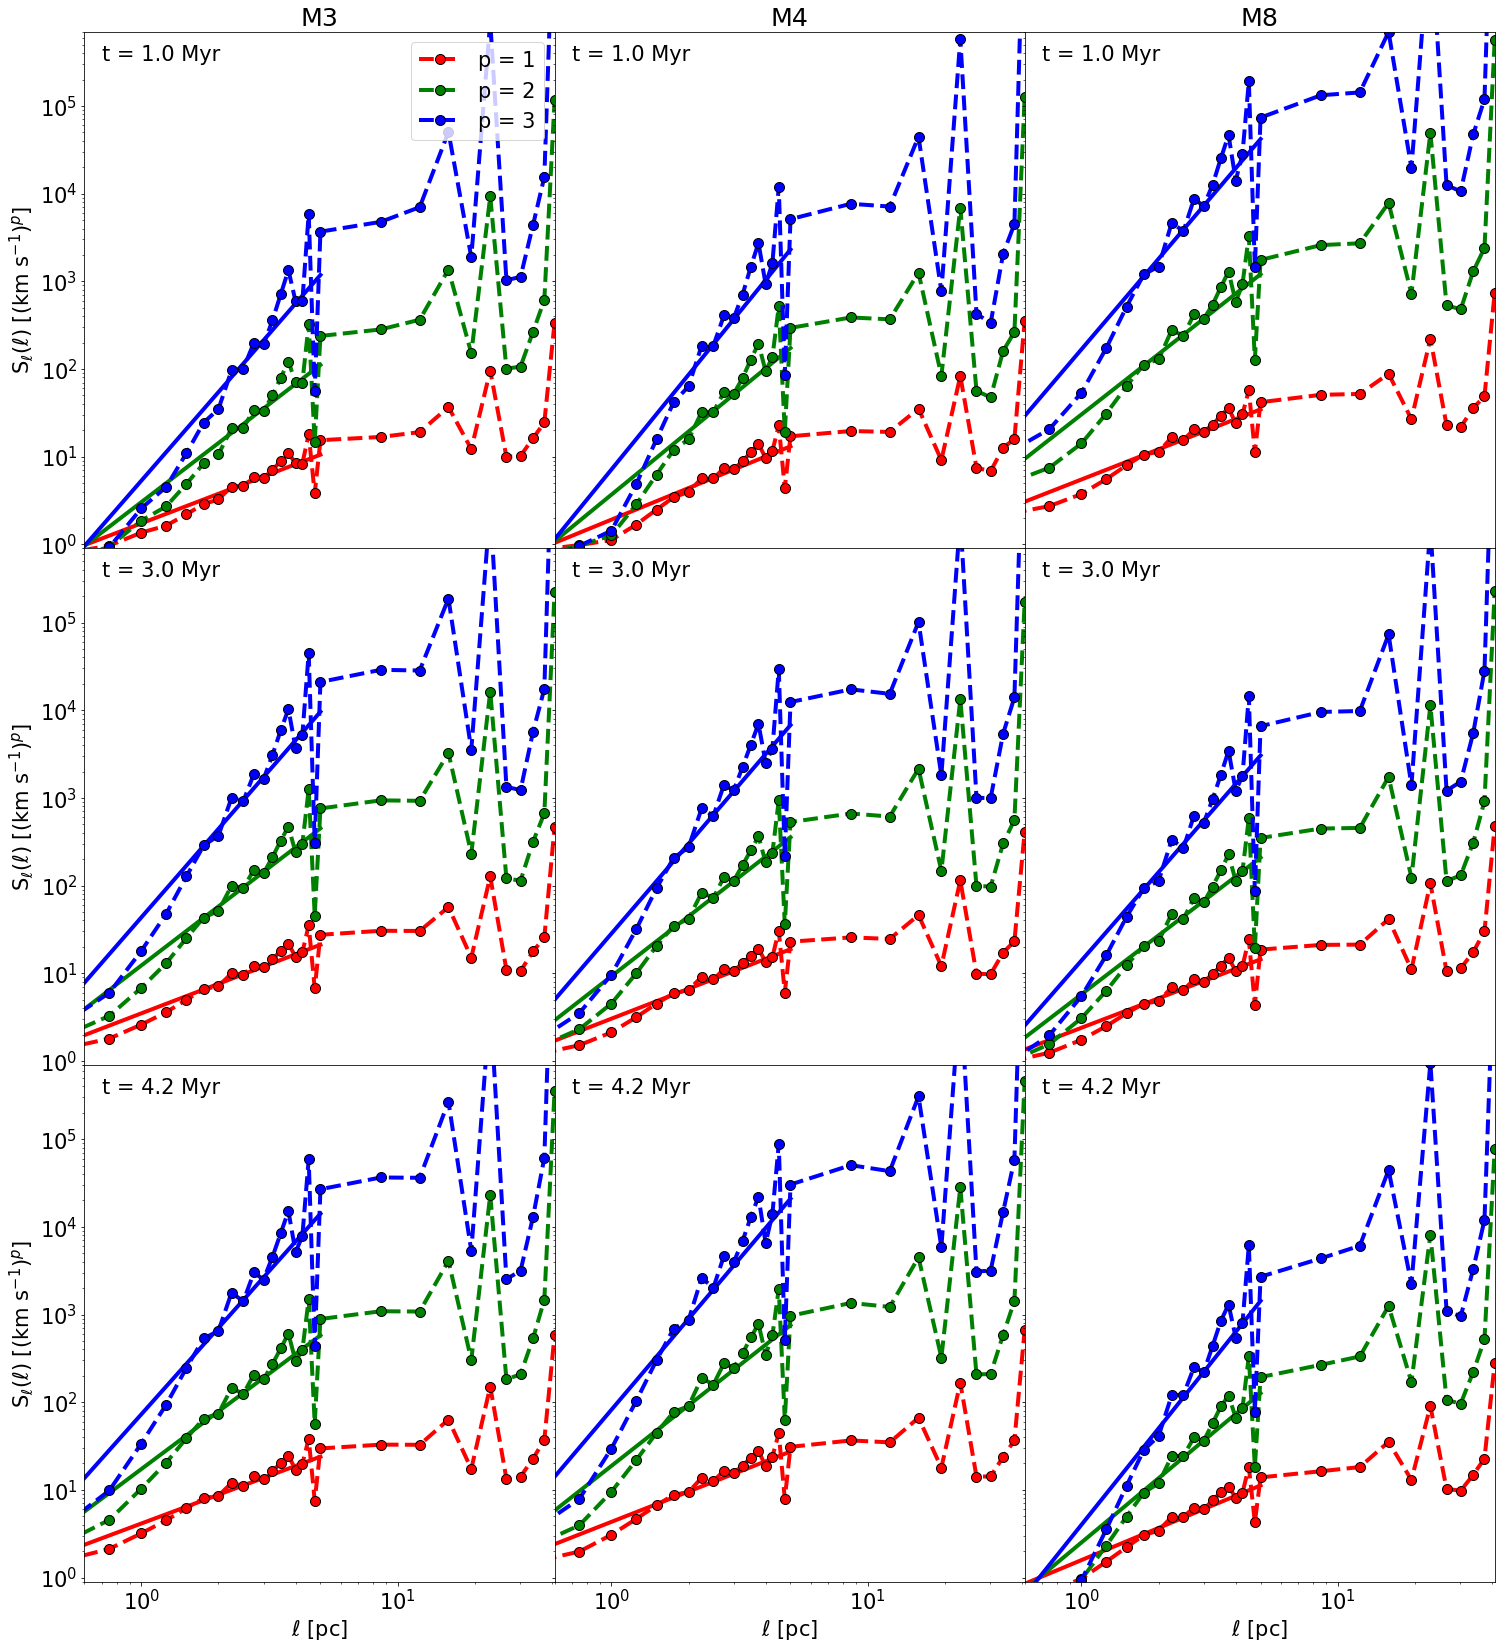

In [4]:
plt.rcParams['font.size'] = 21
fig,ax = plt.subplots(nrows=nrow,ncols=ncol,sharex=True,sharey=True,figsize=(21,23))

xlim   = [0.6,41]
ylim   = [9e-1,7e5]
dturb  = '/Volumes/2TB-BACKUP/turbulence/strucfunc/vsfhr04_rand/'
for icloud,itime in itertools.product(range(len(dcloud)),range(len(dtime))):
    cloud = dcloud[icloud]
    time  = dtime[itime]
    ifile = glob(dturb+'vel_struc_func_'+cloud+'_'+time+'.dat')[0]
    ltot,s1,s2,s3 = np.array([]),np.array([]),np.array([]),np.array([])
    ltot,s1,s2,s3 = np.loadtxt(ifile,usecols=(0,1,2,3),skiprows=2,unpack=True)
    
    for p in range(1,4):
        if(p == 1): s = s1
        if(p == 2): s = s2
        if(p == 3): s = s3
        
        h = np.where(ltot <= 8.)[0]
        popt, pcov = curve_fit(vsffit,np.log10(ltot[h]),np.log10(s[h]))
        ax[itime,icloud].plot(ltot[h],10.**vsffit(np.log10(ltot[h]),*popt),ls='-',color=color[p-1],ms=ms,lw=lw,markeredgecolor='black')
        ax[itime,icloud].plot(ltot,s,color=color[p-1],ls='--',marker='o',ms=ms,lw=lw,markeredgecolor='black',label=('p = %i' % (p)))
               
    ax[itime,icloud].set_xscale('log')
    ax[itime,icloud].set_yscale('log')
    ax[itime,icloud].set_xlim(xlim)
    ax[itime,icloud].set_ylim(ylim)
    
    if(icloud == 0):
        ax[itime,icloud].set_ylabel('S$_{\ell}$(${\ell}$) [(km s$^{-1}$)$^p$]') 
    if(itime == 0):
        ax[itime,icloud].set_title('%s' % (cloud))
    if(itime == len(dtime)-1):
        ax[itime,icloud].set_xlabel('${\ell}$ [pc]')
        
    ax[itime,icloud].text(0.7,3.3e5,'t = %3.1f Myr' % (float(time)*0.1))
        
    if(icloud == 0 and itime == 0): 
        ax[itime,icloud].legend(loc=1)
        
        
fig.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(dpic+'app_examples_woutthres_s_l.pdf')

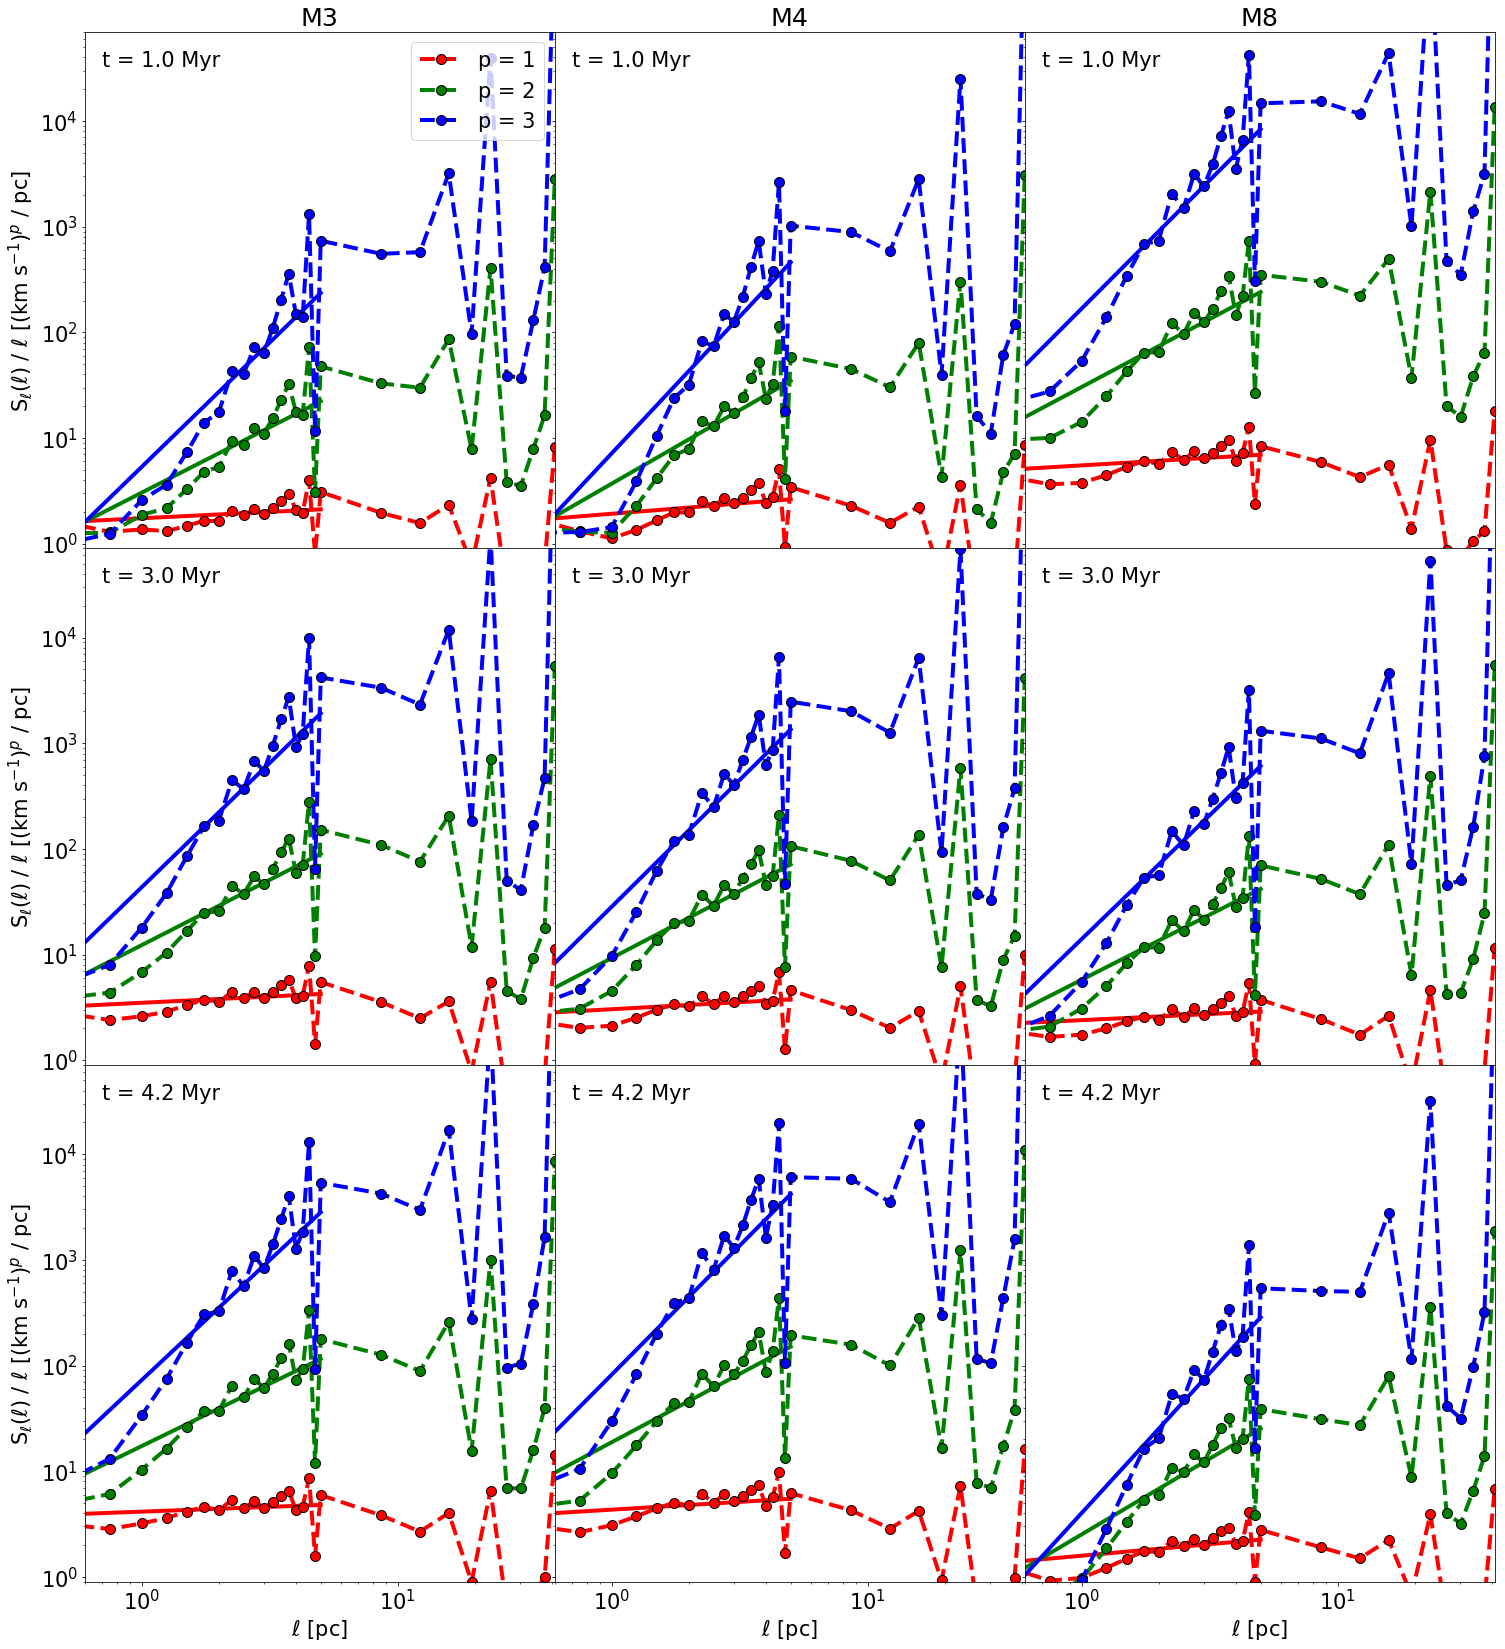

In [5]:
plt.rcParams['font.size'] = 21
fig,ax = plt.subplots(nrows=nrow,ncols=ncol,sharex=True,sharey=True,figsize=(21,23))

xlim   = [0.6,41]
ylim   = [9e-1,7e4]
dturb  = '/Volumes/2TB-BACKUP/turbulence/strucfunc/vsfhr04_rand/'
for icloud,itime in itertools.product(range(len(dcloud)),range(len(dtime))):
    cloud = dcloud[icloud]
    time  = dtime[itime]
    ifile = glob(dturb+'vel_struc_func_'+cloud+'_'+time+'.dat')[0]
    ltot,s1,s2,s3 = np.array([]),np.array([]),np.array([]),np.array([])
    ltot,s1,s2,s3 = np.loadtxt(ifile,usecols=(0,1,2,3),skiprows=2,unpack=True)
    
    for p in range(1,4):
        if(p == 1): s = s1
        if(p == 2): s = s2
        if(p == 3): s = s3
        s = s/ltot
        
        h = np.where(ltot <= 8.)[0]
        popt, pcov = curve_fit(vsffit,np.log10(ltot[h]),np.log10(s[h]))
        ax[itime,icloud].plot(ltot[h],10.**vsffit(np.log10(ltot[h]),*popt),ls='-',color=color[p-1],ms=ms,lw=lw,markeredgecolor='black')
        ax[itime,icloud].plot(ltot,s,color=color[p-1],ls='--',marker='o',ms=ms,lw=lw,markeredgecolor='black',label=('p = %i' % (p)))
               
    ax[itime,icloud].set_xscale('log')
    ax[itime,icloud].set_yscale('log')
    ax[itime,icloud].set_xlim(xlim)
    ax[itime,icloud].set_ylim(ylim)
    
    if(icloud == 0):
        ax[itime,icloud].set_ylabel('S$_{\ell}$(${\ell}$) / $\ell$ [(km s$^{-1}$)$^p$ / pc]') 
    if(itime == 0):
        ax[itime,icloud].set_title('%s' % (cloud))
    if(itime == len(dtime)-1):
        ax[itime,icloud].set_xlabel('${\ell}$ [pc]')
        
    ax[itime,icloud].text(0.7,3.3e4,'t = %3.1f Myr' % (float(time)*0.1))
        
    if(icloud == 0 and itime == 0): 
        ax[itime,icloud].legend(loc=1)
        
        
fig.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(dpic+'app_examples_woutthres_sl_l.pdf')

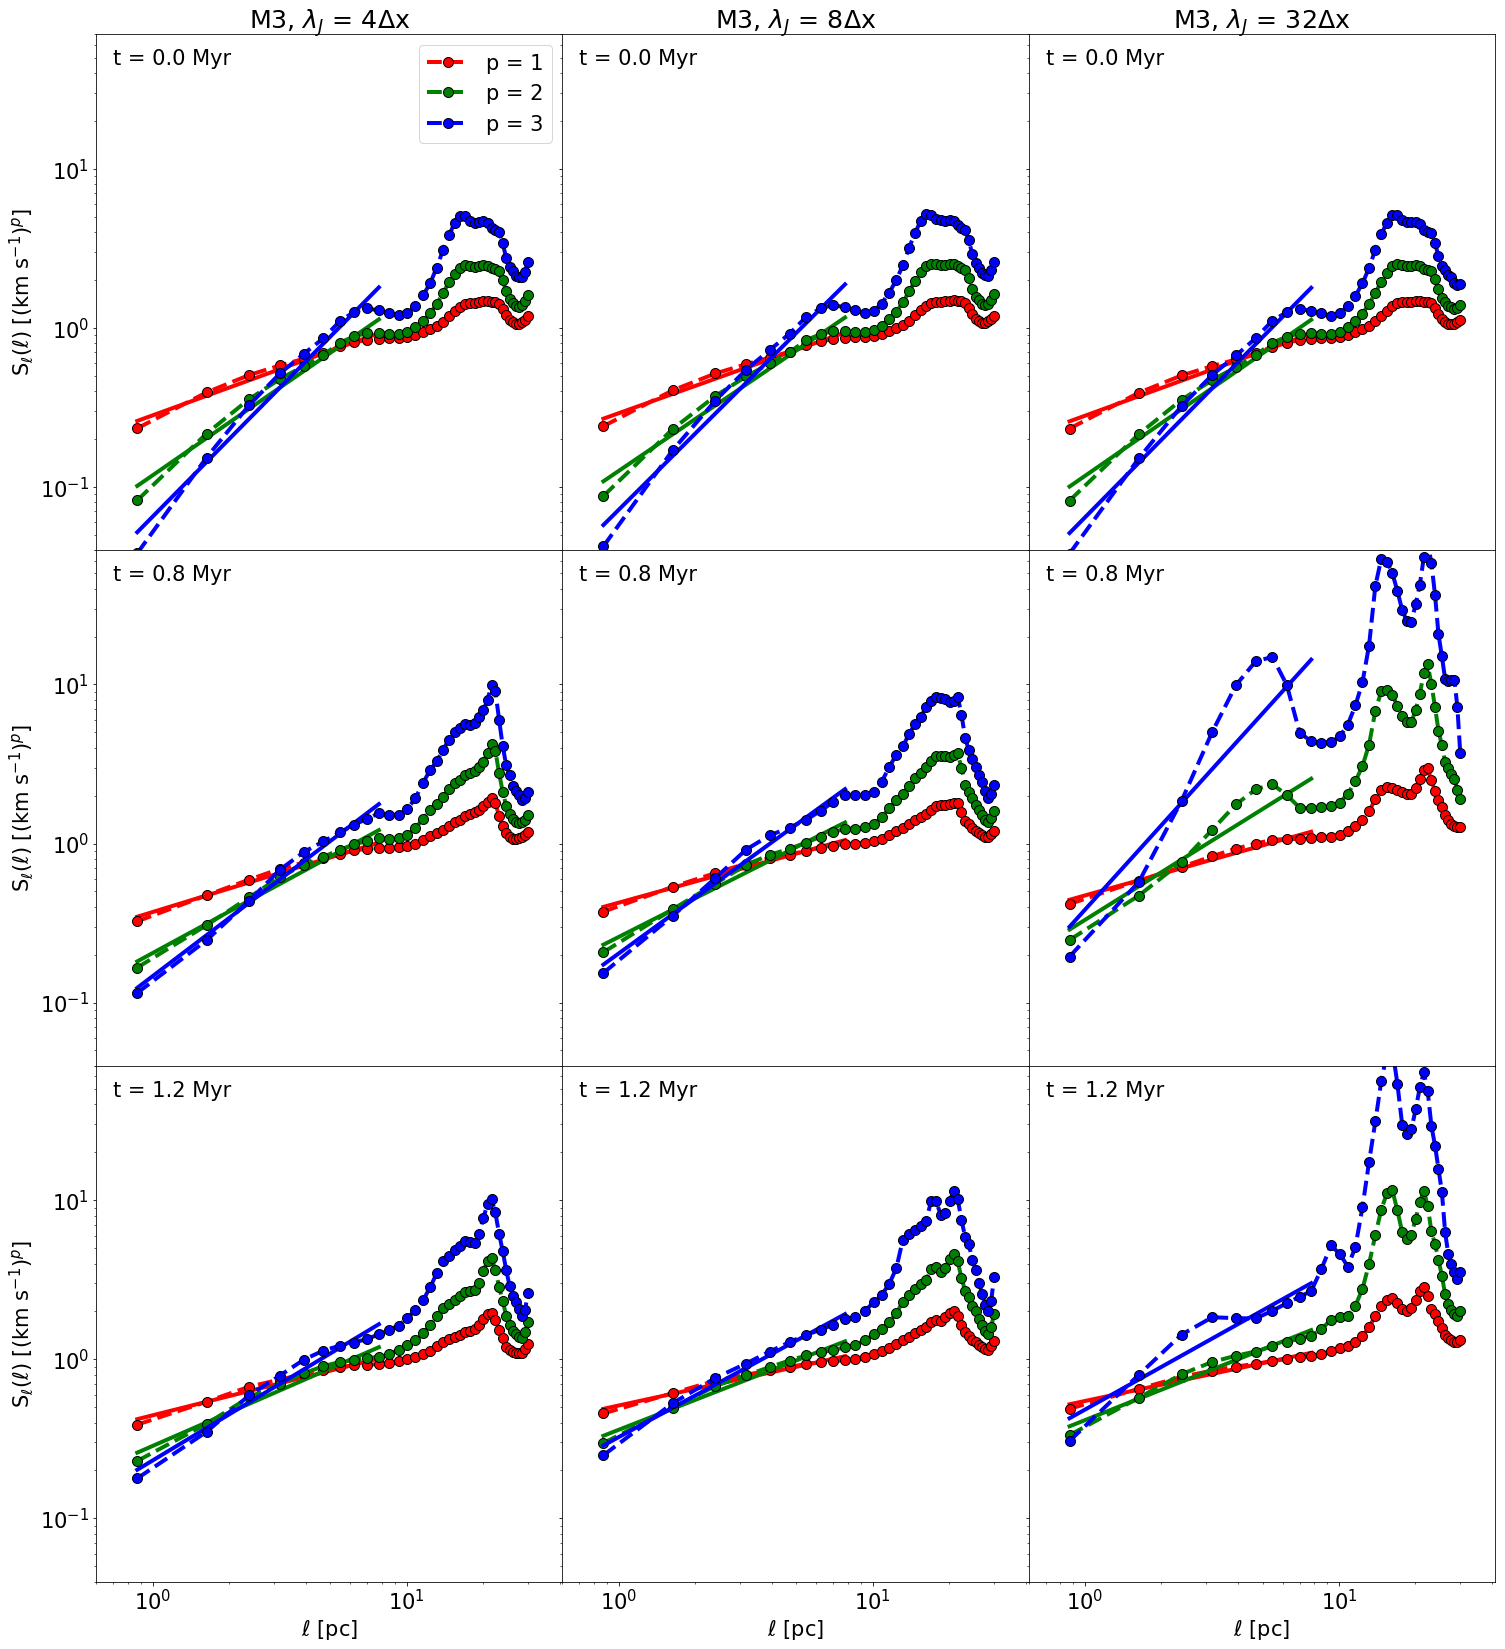

In [8]:
plt.rcParams['font.size'] = 21
fig,ax = plt.subplots(nrows=nrow,ncols=ncol,sharex=True,sharey=True,figsize=(21,23))

dtime  = ['0000','0008','0012']
xlim   = [0.6,41]
ylim   = [4e-2,7e1]

for ijeans,itime in itertools.product(range(len(djeans)),range(len(dtime))):
    cloud = dcloud[0]
    time  = dtime[itime]
    jeans = djeans[ijeans]
    
    dturb  = '/Volumes/2TB-BACKUP/turbulence/strucfunc/vsfhr'+jeans+'/'
    ifile = glob(dturb+'vel_struc_func_'+cloud+'_'+time+'.dat')[0]
    ltot,s1,s2,s3 = np.array([]),np.array([]),np.array([]),np.array([])
    ltot,s1,s2,s3 = np.loadtxt(ifile,usecols=(0,1,2,3),skiprows=2,unpack=True)
    
    for p in range(1,4):
        if(p == 1): s = s1
        if(p == 2): s = s2
        if(p == 3): s = s3
        
        h = np.where(ltot <= 8.)[0]
        popt, pcov = curve_fit(vsffit,np.log10(ltot[h]),np.log10(s[h]))
        ax[itime,ijeans].plot(ltot[h],10.**vsffit(np.log10(ltot[h]),*popt),ls='-',color=color[p-1],ms=ms,lw=lw,markeredgecolor='black')
        ax[itime,ijeans].plot(ltot,s,color=color[p-1],ls='--',marker='o',ms=ms,lw=lw,markeredgecolor='black',label=('p = %i' % (p)))
               
    ax[itime,ijeans].set_xscale('log')
    ax[itime,ijeans].set_yscale('log')
    ax[itime,ijeans].set_xlim(xlim)
    ax[itime,ijeans].set_ylim(ylim)
    
    if(ijeans == 0):
        ax[itime,ijeans].set_ylabel('S$_{\ell}$(${\ell}$) [(km s$^{-1}$)$^p$]') 
    if(itime == 0):
        ax[itime,ijeans].set_title('%s, $\lambda_J$ = %i$\Delta$x' % (cloud,int(jeans)))
    if(itime == len(dtime)-1):
        ax[itime,ijeans].set_xlabel('${\ell}$ [pc]')
    if(ijeans == 0 and itime == 0): 
        ax[itime,ijeans].legend(loc=0)
        
    ax[itime,ijeans].text(0.7,45,'t = %3.1f Myr' % (float(time)*0.1))
        
fig.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(dpic+'app_examples_jeans_s_l.pdf')

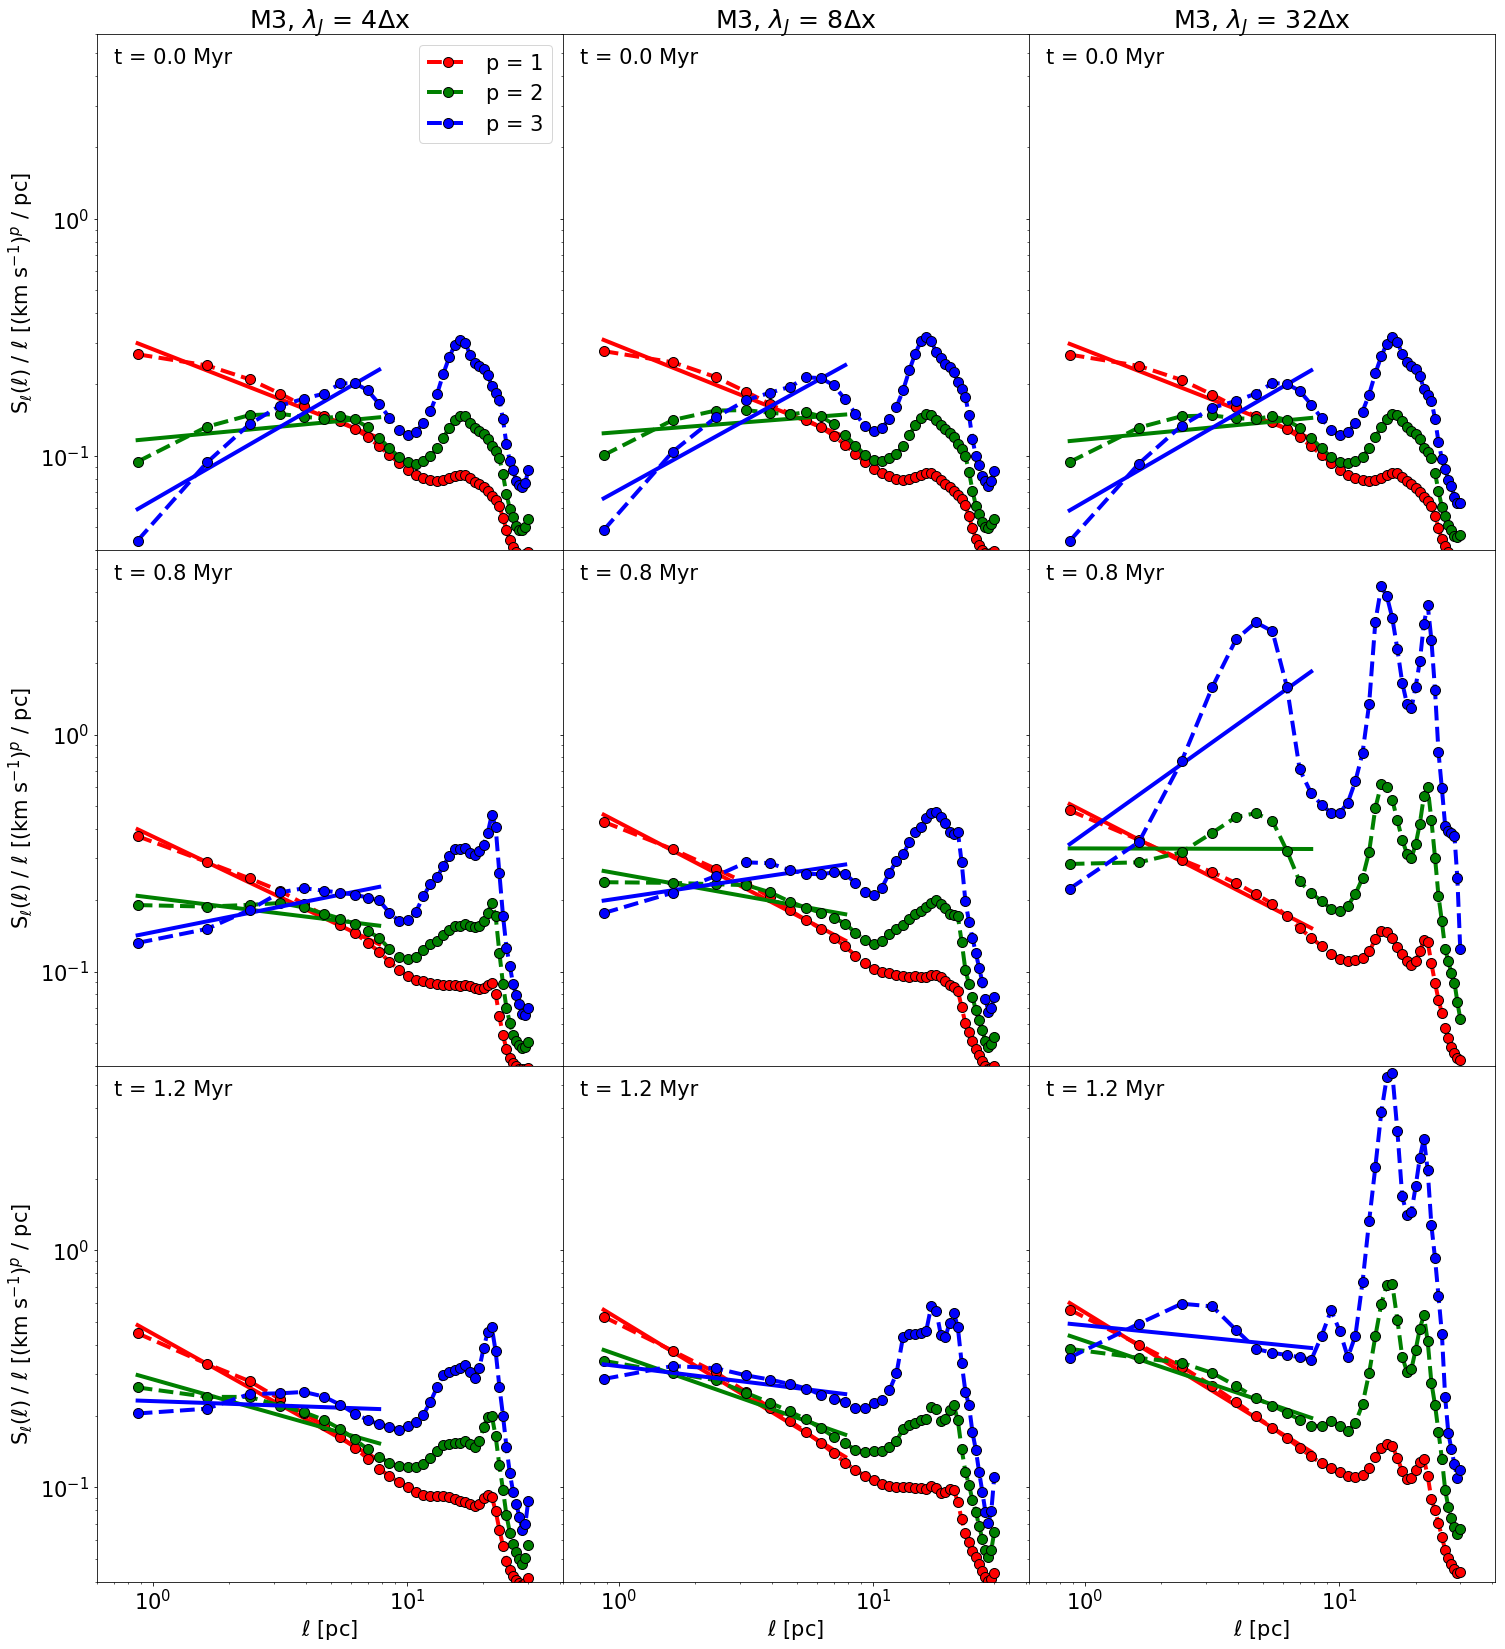

In [7]:
plt.rcParams['font.size'] = 21
fig,ax = plt.subplots(nrows=nrow,ncols=ncol,sharex=True,sharey=True,figsize=(21,23))

dtime  = ['0000','0008','0012']
xlim   = [0.6,41]
ylim   = [4e-2,6e0]

for ijeans,itime in itertools.product(range(len(djeans)),range(len(dtime))):
    cloud = dcloud[0]
    time  = dtime[itime]
    jeans = djeans[ijeans]
    
    dturb  = '/Volumes/2TB-BACKUP/turbulence/strucfunc/vsfhr'+jeans+'/'
    ifile = glob(dturb+'vel_struc_func_'+cloud+'_'+time+'.dat')[0]
    ltot,s1,s2,s3 = np.array([]),np.array([]),np.array([]),np.array([])
    ltot,s1,s2,s3 = np.loadtxt(ifile,usecols=(0,1,2,3),skiprows=2,unpack=True)
    
    for p in range(1,4):
        if(p == 1): s = s1
        if(p == 2): s = s2
        if(p == 3): s = s3
        s = s/ltot
        
        h = np.where(ltot <= 8.)[0]
        popt, pcov = curve_fit(vsffit,np.log10(ltot[h]),np.log10(s[h]))
        ax[itime,ijeans].plot(ltot[h],10.**vsffit(np.log10(ltot[h]),*popt),ls='-',color=color[p-1],ms=ms,lw=lw,markeredgecolor='black')
        ax[itime,ijeans].plot(ltot,s,color=color[p-1],ls='--',marker='o',ms=ms,lw=lw,markeredgecolor='black',label=('p = %i' % (p)))
               
    ax[itime,ijeans].set_xscale('log')
    ax[itime,ijeans].set_yscale('log')
    ax[itime,ijeans].set_xlim(xlim)
    ax[itime,ijeans].set_ylim(ylim)
    
    if(ijeans == 0):
        ax[itime,ijeans].set_ylabel('S$_{\ell}$(${\ell}$) / $\ell$ [(km s$^{-1}$)$^p$ / pc]') 
    if(itime == 0):
        ax[itime,ijeans].set_title('%s, $\lambda_J$ = %i$\Delta$x' % (cloud,int(jeans)))
    if(itime == len(dtime)-1):
        ax[itime,ijeans].set_xlabel('${\ell}$ [pc]')
    if(ijeans == 0 and itime == 0): 
        ax[itime,ijeans].legend(loc=0)
        
    ax[itime,ijeans].text(0.7,4.5,'t = %3.1f Myr' % (float(time)*0.1))
        
fig.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(dpic+'app_examples_jeans_sl_l.pdf')